# IBM Data Science Professional Certificate - Applied Data Science Capstone

# Prediction of the Car Accident Severity in Seattle City, Washington

## 1. Introduction

There are various factors contributing to the occurrence of a car accident in the highways. The main objective of this project is to create a machine learning model to predict the possibility of the car accident and how severe it would be according to given features such as weather and road conditions, so that people drive more carefully or even change their travel if they are able to.

This model can be utilized to warn people to be especially mindful when travelling and to notify relevant authorities to be prepared for an accident with a certain severity level in given conditions and take immediate action to mitigate the consequences of it.

## 2. Data Understanding

The required data for this project is acquired from Seattle Open Data Portal [1]. It includes all types of collisions in the city from 2004 to present with the label of accident severity which defines the fatality of an accident. Apart from the label column, the dataset consists of 37 total attributes providing various types of information about location, date/time, weather and light conditions. Metadata form from the website provide a good description for all attributes.
After investigating all the attributes in the dataset and performing the exploratory data analysis, it is concluded that initially selected attributes are the inattention contribution, the weather condition, the road condition, and the light condition of a car accident to train the machine learning model. Remaining attributes in the dataset will be removed to reduce the processing and memory load in the modelling.

[1] https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0

Download the data from the link provided by Applied Data Science Capstone project.

In [1]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-15 00:16:54--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  36.0MB/s   in 2.0s   

2020-09-15 00:16:56 (36.0 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



## 3. Importing libraries and packages

Throughout this analysis, we will be dealing with basic dataframe and array operations, visualizations, model development and model evaluation. For this goal, let's import the required libraries and packages.

In [2]:
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## 4. Exploratory data analysis

In order to have a deeper understanding of the dataset, we should perform the fundamental data exploration techniques by means of pandas library.

You will find the explanation of all performed operations in the notebook as in-cell notations.

In [3]:
# option for showing all the columns when head or describe methods are used

pd.set_option('display.max_columns', None)


# read the data into a pandas dataframe and have a look at the first 5 rows

df = pd.read_csv('Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
# check the dimensions of the dataset

print('The dimensions of dataset is:', df.shape)

The dimensions of dataset is: (194673, 38)


In [5]:
# look at the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [6]:
# check the statistical summary of all types of attributes in the dataset

df.describe(include = "all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,191996,84811,5638,194673.000000,194673,189769,194673.000000,194673.000000,194673.000000,194673.000000,194673,194673,188344,194673.000000,194673,29805,189789,189592,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,24102,2,1,NaN,2,10,NaN,NaN,NaN,NaN,5985,162058,7,NaN,39,1,4,11,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",NaN,Property Damage Only Collision,Parked Car,NaN,NaN,NaN,NaN,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),NaN,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,276,79173,5638,NaN,136485,47987,NaN,NaN,NaN,NaN,96,96,89800,NaN,85209,29805,100274,111135,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,NaN,NaN,NaN,1.298901,NaN,NaN,2.444427,0.037139,0.028391,1.920780,NaN,NaN,NaN,13.867768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,NaN,NaN,NaN,0.457778,NaN,NaN,1.345929,0.198150,0.167413,0.631047,NaN,NaN,NaN,6.868755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,NaN,NaN,NaN,2.000000,NaN,NaN,3.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


## 5. Data wrangling

### Decision of attributes

We should decide which columns will be removed before proceeding to the modelling phase since the dataset involves additional attributes such as registration information and ID codes. After investigating the attribute information in the dataset metadata and looking at the content in the cells we can confidently say that the columns to be dropped in the next cell will not serve our goal and will not be used in the feature set of our machine learning model.

In [7]:
# drop unnecessary columns and read the cleaned dataframe into a new dataframe

df_c = df.drop(['OBJECTID','INCKEY','COLDETKEY','REPORTNO','INTKEY','LOCATION','EXCEPTRSNCODE','STATUS','PEDROWNOTGRNT','EXCEPTRSNDESC','SEVERITYCODE.1','SEVERITYDESC','INCDTTM','ST_COLCODE','HITPARKEDCAR','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','ST_COLDESC','SEGLANEKEY','X','Y','CROSSWALKKEY'], axis=1)

df_c.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN
1,1,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN
3,1,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN
4,2,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN


In [8]:
print('The dimensions of dataset is:',df_c.shape)

The dimensions of dataset is: (194673, 15)


### Adding a new attribute from an existing one

Since we have a incident date attribute it is worth to create a day of the week attribute to check if there is a correlation between the accident severity and the day of the week.

In [9]:
# add a day attribute to the dataset

df_c['DAY'] = pd.to_datetime(df_c['INCDATE']).dt.dayofweek

### Dealing with Unknown/Other and NaN values

As it can be seen from the dataset, some of the attributes includes 'Other' and 'Unknown' values. They need to be converted into NaN first.


In [10]:
# Replace unknown and other values with NaN

df_c['WEATHER'].replace("Unknown", np.nan, inplace = True)
df_c['WEATHER'].replace("Other", np.nan, inplace = True)
df_c['ROADCOND'].replace("Unknown", np.nan, inplace = True)
df_c['ROADCOND'].replace("Other", np.nan, inplace = True)
df_c['LIGHTCOND'].replace("Unknown", np.nan, inplace = True)
df_c['LIGHTCOND'].replace("Other", np.nan, inplace = True)
df_c['JUNCTIONTYPE'].replace("Unknown", np.nan, inplace = True)

Additionally, attributes should be unified to a single binary categorization such as 0-1 or N-Y by replacing NaN values.

In [11]:
# replace NaN with N

df_c['SPEEDING'].replace(np.nan, 'N', inplace=True)
df_c['INATTENTIONIND'].replace(np.nan, 'N', inplace=True)

# replace NaN with 0

df_c['UNDERINFL'].replace(np.nan, '0', inplace=True)

# change the data types of the attributes in which the NaN values will be replaced

df_c['UNDERINFL'].astype('str')
df_c['SPEEDING'].astype('str')
df_c['INATTENTIONIND'].astype('str')

# unify the binary attributes and change data types accordingly

df_c['UNDERINFL'].replace('N','0', inplace=True)
df_c['UNDERINFL'].replace('Y','1', inplace=True)
df_c['SPEEDING'].replace('N','0', inplace=True)
df_c['SPEEDING'].replace('Y','1', inplace=True)
df_c['INATTENTIONIND'].replace('N','0', inplace=True)
df_c['INATTENTIONIND'].replace('Y','1', inplace=True)

# change the data types of the attributes back to int

df_c['UNDERINFL'] = df_c['UNDERINFL'].astype('int64')
df_c['SPEEDING'] = df_c['SPEEDING'].astype('int64')
df_c['INATTENTIONIND'] = df_c['INATTENTIONIND'].astype('int64')

Final step is to drop the rows involving NaN values.

In [12]:
# drop the rows including NaN columns

df_c.dropna(inplace = True)
df_c.reset_index(drop=True, inplace=True)
df_c.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,DAY
0,2,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),0,0,Overcast,Wet,Daylight,0,2
1,1,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),0,0,Raining,Wet,Dark - Street Lights On,0,2
2,1,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),0,0,Overcast,Dry,Daylight,0,3
3,1,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,4
4,2,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,At Intersection (intersection related),0,0,Raining,Wet,Daylight,0,2


In [13]:
df_c.shape

(167318, 16)

### Investigate the categorical variables that are more likely to be features for our model by grouping by the target variable

#### ADDRTYPE

In [14]:
df_c.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

ADDRTYPE      SEVERITYCODE
Alley         1               0.845304
              2               0.154696
Block         1               0.731034
              2               0.268966
Intersection  1               0.562264
              2               0.437736
Name: SEVERITYCODE, dtype: float64

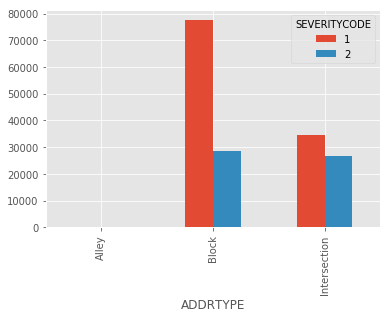

In [15]:
plt.style.use('ggplot')
df_c.groupby(['ADDRTYPE', 'SEVERITYCODE']).size().unstack().plot.bar(legend=True)
plt.show()

#### COLLISIONTYPE

In [16]:
df_c.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

COLLISIONTYPE  SEVERITYCODE
Angles         1               0.603006
               2               0.396994
Cycles         2               0.883259
               1               0.116741
Head On        1               0.559856
               2               0.440144
Left Turn      1               0.599850
               2               0.400150
Other          1               0.733017
               2               0.266983
Parked Car     1               0.920676
               2               0.079324
Pedestrian     2               0.899952
               1               0.100048
Rear Ended     1               0.563682
               2               0.436318
Right Turn     1               0.787933
               2               0.212067
Sideswipe      1               0.862071
               2               0.137929
Name: SEVERITYCODE, dtype: float64

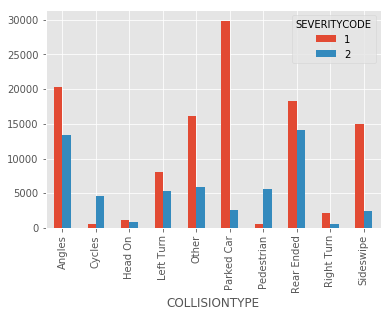

In [17]:
plt.style.use('ggplot')
df_c.groupby(['COLLISIONTYPE', 'SEVERITYCODE']).size().unstack().plot.bar(legend=True)
plt.show()

#### JUNCTIONTYPE

In [18]:
df_c.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

JUNCTIONTYPE                                       SEVERITYCODE
At Intersection (but not related to intersection)  1               0.665737
                                                   2               0.334263
At Intersection (intersection related)             1               0.559100
                                                   2               0.440900
Driveway Junction                                  1               0.685691
                                                   2               0.314309
Mid-Block (but intersection related)               1               0.670669
                                                   2               0.329331
Mid-Block (not related to intersection)            1               0.754463
                                                   2               0.245537
Ramp Junction                                      1               0.679739
                                                   2               0.320261
Name: SEVERITYCODE, dtyp

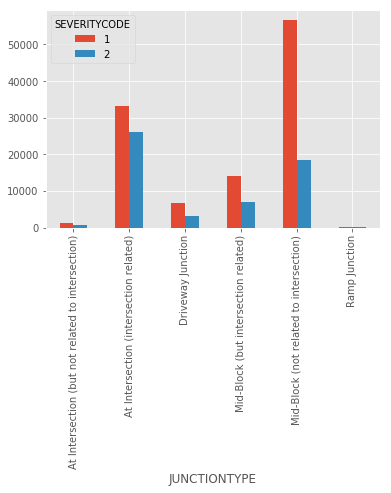

In [19]:
plt.style.use('ggplot')
df_c.groupby(['JUNCTIONTYPE', 'SEVERITYCODE']).size().unstack().plot.bar(legend=True)
plt.show()

#### WEATHER

In [20]:
df_c.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.714286
                          2               0.285714
Clear                     1               0.669823
                          2               0.330177
Fog/Smog/Smoke            1               0.662963
                          2               0.337037
Overcast                  1               0.676920
                          2               0.323080
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.658540
                          2               0.341460
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.745283
                          2               0.254717
Snowing                   1               0.800247
                          2               0.199753
Name: SEVERITYCODE, dtype: float64

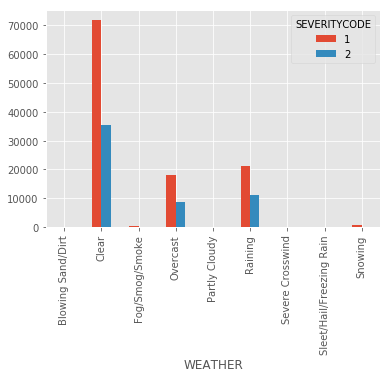

In [21]:
plt.style.use('ggplot')
df_c.groupby(['WEATHER', 'SEVERITYCODE']).size().unstack().plot.bar(legend=True)
plt.show()

#### ROADCOND

In [22]:
df_c.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             1               0.670431
                2               0.329569
Ice             1               0.758231
                2               0.241769
Oil             1               0.578947
                2               0.421053
Sand/Mud/Dirt   1               0.650000
                2               0.350000
Snow/Slush      1               0.812880
                2               0.187120
Standing Water  1               0.732673
                2               0.267327
Wet             1               0.662207
                2               0.337793
Name: SEVERITYCODE, dtype: float64

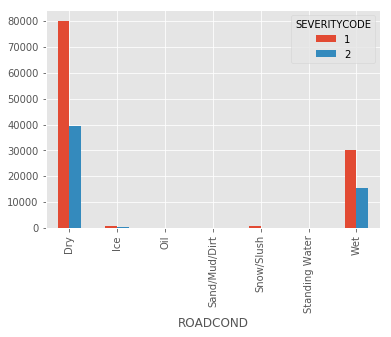

In [23]:
plt.style.use('ggplot')
df_c.groupby(['ROADCOND', 'SEVERITYCODE']).size().unstack().plot.bar(legend=True)
plt.show()

#### LIGHTCOND

In [24]:
df_c.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.765359
                          2               0.234641
Dark - Street Lights Off  1               0.717972
                          2               0.282028
Dark - Street Lights On   1               0.692114
                          2               0.307886
Dark - Unknown Lighting   1               0.625000
                          2               0.375000
Dawn                      1               0.662168
                          2               0.337832
Daylight                  1               0.659025
                          2               0.340975
Dusk                      1               0.660065
                          2               0.339935
Name: SEVERITYCODE, dtype: float64

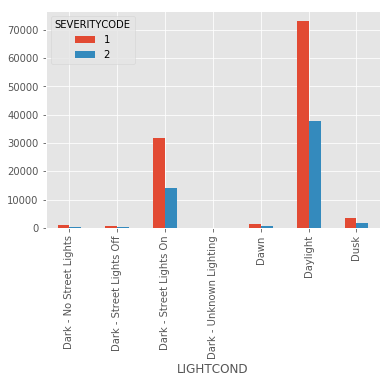

In [25]:
plt.style.use('ggplot')
df_c.groupby(['LIGHTCOND', 'SEVERITYCODE']).size().unstack().plot.bar(legend=True)
plt.show()

We can see correlation between the accident severity and all of the categorical variables, so we will use these attributes together with the binary categorical variables as independent variables in our model.

## 6. Modeling

Since we are using categorical data in the labeled data, we should use a classification algorithm. We will first train the data and then calculate the corresponding evaluation metrics by means of the prediction and the test set.

### Feature set selection

First, add the continuous variables and the binary categorical variables into the feature set.

In [26]:
Feature = df_c[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','UNDERINFL','SPEEDING','DAY']]

Use one hot encoding technique to convert categorical variables to binary variables and append them to the feature dataframe. We can also drop the attributes which are not including significant amount of data after one-hot encoding. This operation will help us remove the cluster from the data and save us time in the modeling phase.

In [27]:
# one hot encoding

Feature = pd.concat([Feature,pd.get_dummies(df_c['WEATHER'])], axis=1)
Feature.drop(['Blowing Sand/Dirt','Fog/Smog/Smoke','Partly Cloudy','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing'], axis = 1,inplace=True)

Feature = pd.concat([Feature,pd.get_dummies(df_c['ROADCOND'])], axis=1)
Feature.drop(['Ice','Snow/Slush','Standing Water','Sand/Mud/Dirt','Oil'], axis = 1,inplace=True)

Feature = pd.concat([Feature,pd.get_dummies(df_c['LIGHTCOND'])], axis=1)
Feature.drop(['Dark - Unknown Lighting','Dark - Street Lights Off','Dark - No Street Lights','Dawn'], axis = 1,inplace=True)

Feature = pd.concat([Feature,pd.get_dummies(df_c['ADDRTYPE'])], axis=1)

Feature = pd.concat([Feature,pd.get_dummies(df_c['JUNCTIONTYPE'])], axis=1)

Feature = pd.concat([Feature,pd.get_dummies(df_c['COLLISIONTYPE'])], axis=1)


# create the feature set

X = Feature
X[0:5]

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,SPEEDING,DAY,Clear,Overcast,Raining,Dry,Wet,Dark - Street Lights On,Daylight,Dusk,Alley,Block,Intersection,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,2,0,0,2,0,0,2,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,0,0,2,0,0,2,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,4,0,0,3,0,0,3,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,3,0,0,3,0,0,4,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,2,0,0,2,0,0,2,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Label set selection

In [28]:
y = df_c['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

### Normalization

In [29]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-0.36273394, -0.19699594, -0.17915388,  0.04797584, -0.23675689,
        -0.23796505, -0.4905536 , -1.33356648,  2.30544536, -0.48814211,
        -1.58199921,  1.6322107 , -0.61592376,  0.71294696, -0.18529427,
        -0.03290811, -1.31401961,  1.31708538, -0.10404852,  1.34850364,
        -0.25147785, -0.38044142, -0.90025984, -0.03025332,  1.99239674,
        -0.17893605, -0.10825187, -0.29409969, -0.38857197, -0.49027187,
        -0.19710057, -0.48955906, -0.13048217, -0.34092118],
       [-0.36273394, -0.19699594, -0.17915388,  0.04797584, -0.23675689,
        -0.23796505, -0.4905536 , -1.33356648, -0.43375567,  2.04858374,
        -1.58199921,  1.6322107 ,  1.62357756, -1.40262888, -0.18529427,
        -0.03290811,  0.76102365, -0.75925222, -0.10404852, -0.7415627 ,
        -0.25147785, -0.38044142,  1.11079042, -0.03025332, -0.50190807,
        -0.17893605, -0.10825187, -0.29409969, -0.38857197, -0.49027187,
        -0.19710057, -0.48955906, -0.13048217,  2.93322932],
  

### Splitting dataset into train and test sets

In [30]:
# split the X into train and test to find the best k

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (133854, 34) (133854,)
Test set: (33464, 34) (33464,)


### Decision Tree

In [31]:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
yhat_dt = DT_model.predict(X_test)
yhat_dt

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
print("DT Classification Report: \n\n",classification_report(y_test,yhat_dt))
print("DT Jaccard index: %.4f" % jaccard_similarity_score(y_test, yhat_dt))
print("DT F1-score: %.4f" % f1_score(y_test, yhat_dt, average='weighted') )

DT Classification Report: 

               precision    recall  f1-score   support

           1       0.71      0.99      0.83     22337
           2       0.90      0.18      0.31     11127

   micro avg       0.72      0.72      0.72     33464
   macro avg       0.80      0.59      0.57     33464
weighted avg       0.77      0.72      0.65     33464

DT Jaccard index: 0.7221
DT F1-score: 0.6535


### XGBoost

In [34]:
XGB_model = XGBClassifier(random_state=0)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [35]:
yhat_xgb = XGB_model.predict(X_test)

In [36]:
print("XGB Classification Report: \n\n",classification_report(y_test,yhat_xgb))
print("XGB Jaccard index: %.4f" % jaccard_similarity_score(y_test, yhat_xgb))
print("XGB F1-score: %.4f" % f1_score(y_test, yhat_xgb, average='weighted') )

XGB Classification Report: 

               precision    recall  f1-score   support

           1       0.73      0.95      0.83     22337
           2       0.75      0.30      0.42     11127

   micro avg       0.73      0.73      0.73     33464
   macro avg       0.74      0.62      0.63     33464
weighted avg       0.74      0.73      0.69     33464

XGB Jaccard index: 0.7334
XGB F1-score: 0.6928


### Logistic Regression

In [37]:
LR_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
yhat_lr = LR_model.predict(X_test)
yhat_lr

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
yhat_lr_prob = LR_model.predict_proba(X_test)

In [40]:
print("LR Jaccard index: %.4f" % jaccard_similarity_score(y_test, yhat_lr))
print("LR F1-score: %.4f" % f1_score(y_test, yhat_lr, average='weighted') )
print("LR LogLoss: %.4f" % log_loss(y_test, yhat_lr_prob))

LR Jaccard index: 0.7322
LR F1-score: 0.6915
LR LogLoss: 0.5208


## 7. Results and discussion

Below we can see the evaluation metrics for three different classification methods.

Method        | Jaccard Index  | F1-score       | LogLoss
------------- | -------------  | -------------  | ------------- 
Decision Tree | 0.7221         | 0.6535         | NA
XGBoost       | 0.7334         | 0.6928         | NA
Logistic Regression | 0.7322         | 0.6915         | 0.5208

Considering all the calculated evaluation metrics, we can say that the most accurate classification machine learning model to predict the severity of an accident in Seattle is XGBoost with a 74.34% accuracy with Jaccard Index.

Since we have a very close accuracy for Logistic Regression, which is used to calculate the probability of the binary classification, we also have the chance of guessing the probability of an accident severity with a 73.22% accuracy.

F1-score has been calculated to utilize the advantage of confusion matrix, which is that it shows the model’s ability to correctly predict or separate the classes. Although it has a decent precision and recall scores, its weighted average is too low compared to Jaccard Index.

## 8. Conclusion

The main goal of this project was to analyze the Seattle car accident dataset and conclude a prediction model based on the given criteria such as day of the week, weather, road and light condition and different locations so that the travellers in the city has an idea about which factors and conditions to pay attention to before travelling.

At the end of the modeling part, we concluded with 3 different classification models all of which can predict the severity of a car accident with almost 73% accuracy. By the help of these models, drivers in Seattle will have the opportunity of paying more attention to given conditions and reduce both the frequency and the severity of a car accident.